# Remember to comment code

In [26]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [124]:
# data = pd.read_csv('../Data/Data Cleaning and Feature Eng/SL-recent-grads.csv')
# data.head()

# read in data
data = pd.read_csv('../Data/Data Cleaning and Feature Eng/recent-grads-new-features.csv')
data.head()

le = LabelEncoder()
data["Major_category_coded"] = le.fit_transform(data["Major_category"])
data.describe()

,Unnamed: 0,Rank,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,...,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science,Major_category_coded
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000
mean,86.075581,87.075581,3880.273256,39394.715116,358.127907,16723.877907,22653.656977,0.523090,31374.116279,26179.994186,...,0.168605,0.069767,0.087209,0.034884,0.005814,0.029070,0.05814,0.052326,0.052326,6.965116
std,50.221266,50.221266,1692.670105,63468.993551,619.578329,28122.182046,41053.785020,0.231135,50766.623538,42948.847324,...,0.375496,0.255498,0.282965,0.184021,0.076249,0.168493,0.23469,0.223333,0.223333,4.241118
min,0.000000,1.000000,1100.000000,609.000000,2.000000,119.000000,0.000000,0.000000,559.000000,488.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,42.750000,43.750000,2402.750000,4559.750000,42.000000,2177.500000,1851.500000,0.336026,3734.750000,3181.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000
50%,86.500000,87.500000,3607.500000,15104.000000,131.000000,5434.000000,8386.500000,0.539560,12031.500000,10073.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,7.000000
75%,129.250000,130.250000,5503.250000,38909.750000,339.000000,14631.000000,22553.750000,0.703299,31701.250000,25447.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,9.000000
max,172.000000,173.000000,6403.000000,393735.000000,4212.000000,173809.000000,307087.000000,0.968954,307933.000000,251540.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,15.000000


In [35]:
train, test = train_test_split(data,test_size=0.2, random_state=42)

Add data histograms here

In [125]:
## HYPERPARAMETERS FOR TUNING
MIN_SAMPLES_SPLIT = 20

c = DecisionTreeClassifier(min_samples_split=MIN_SAMPLES_SPLIT)

In [126]:
## min samples 20

# 42.8%
# features = ['Total',
#             'Major_category_coded',
#             'Percent_low_wage',
#             'Percent_college',
#             'Percent_non_college',
#             'Num_majors',
#             'ShareWomen',
#             'Women',
#             'Part_time',
#             'Unemployment_rate']

# 54%
features = ['Total',
            'Major_category_coded',
            'Percent_low_wage',
            'Percent_college',
            'Percent_non_college',
            'Percent_sample_size',
            'Num_majors',
            'ShareWomen',
            'Women',
            'Part_time']

# ## 65.7%
# features = ['Total',
#             'Major_category_coded',
#             'Percent_low_wage',
#             'Percent_college',
#             'Percent_non_college',
#             'Percent_sample_size',
#             'Num_majors',
#             'ShareWomen',
#             'Women',
#             'Part_time',
#             'Unemployment_rate',
#             'P25th',
#             'P75th']
            
# ## 57%
# features = ['Total',
#             'Major_category_coded',
#             'Percent_low_wage',
#             'Percent_college',
#             'Percent_non_college',
#             'Percent_sample_size',
#             'Num_majors',
#             'ShareWomen',
#             'Women',
#             'Part_time',
#             'Unemployment_rate',
#             'P25th',
#             'P75th']


# encode predicted class variable as numerical label
le = LabelEncoder()
le.fit(data["Median_category"])

LabelEncoder()

In [127]:
X_train = train[features]
y_train = le.transform(train['Median_category'])

X_test = test[features]
y_test = le.transform(test['Median_category'])

In [129]:
X_train

,Total,Major_category_coded,Percent_low_wage,Percent_college,Percent_non_college,Percent_sample_size,Num_majors,ShareWomen,Women,Part_time
101,19879,15,0.095327,0.169677,0.533478,0.010765,9.0,0.618223,13638,4543
56,28187,15,0.088658,0.240324,0.339518,0.007770,9.0,0.632987,17842,5563
42,36698,5,0.045561,0.363617,0.321080,0.011581,11.0,0.707719,1247,4332
82,1329,2,0.042137,0.509406,0.138450,0.006772,14.0,0.528969,703,169
65,8804,7,0.043844,0.277828,0.442526,0.014198,29.0,0.000000,0,1240
...,...,...,...,...,...,...,...,...,...,...
71,2439,0,0.038540,0.219352,0.366134,0.018040,10.0,0.589712,15270,620
106,13773,0,0.102011,0.314601,0.421695,0.011036,10.0,0.564639,35037,2613
14,4321,7,0.060866,0.564453,0.219162,0.006943,29.0,0.183985,795,811
92,213996,4,0.128227,0.190485,0.457784,0.011187,4.0,0.305109,209,49889


In [128]:
c.fit(X_train,y_train)
y_pred = c.predict(X_test)
score = accuracy_score(y_test,y_pred)*100
print("Accuracy using Decision Tree: ",score )

ValueError: Class label Total not present.

In [81]:
print(tree.export_text(c))

|--- feature_12 <= 49950.00
|   |--- class: 2
|--- feature_12 >  49950.00
|   |--- class: 3



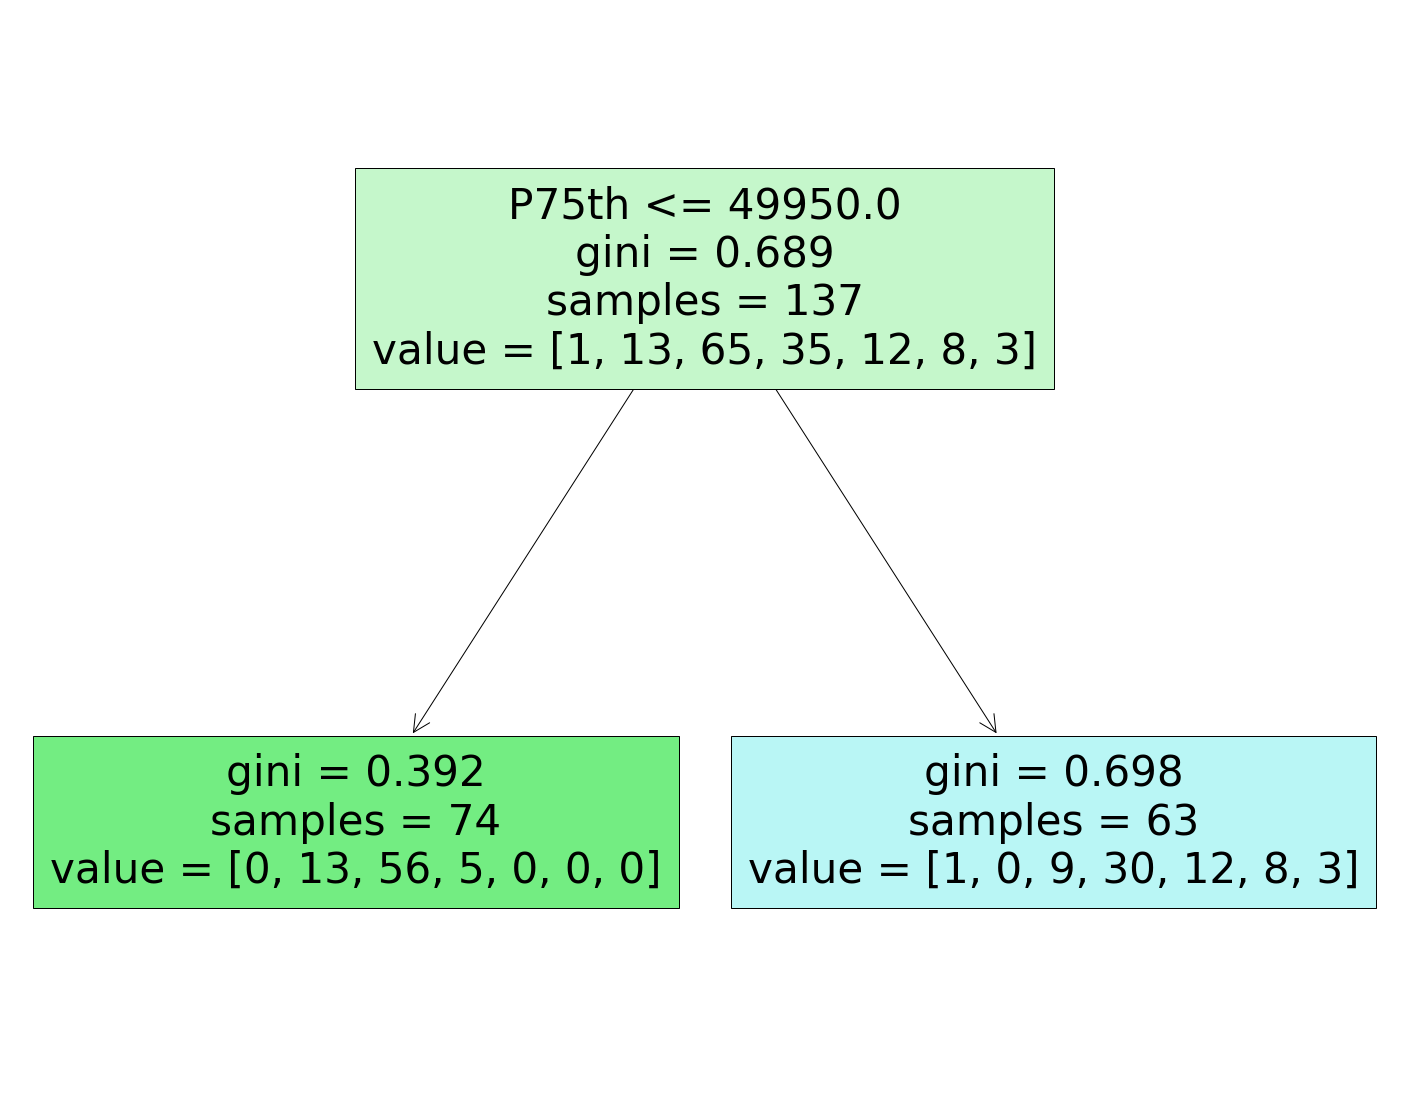

In [82]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(c, 
                   feature_names=X_train.columns,  
#                    class_names=iris.target_names,
                   filled=True)
# fig.savefig("decision_tree.png")

In [ ]:
# def show_tree(tree,features,path):
#   f = io.StringIO()
#   export_graphviz(tree,out_file=f,feature_names=features)
#   pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
#   img = imageio.imread(path)
#   plt.rcParams['figure.figsize'] = (20,20)
#   plt.imshow(img)
# show_tree(c,features,'decision_tree')